# Import Packages

In [1]:
# Import packages
import psycopg2
import pandas as pd
import numpy as np
import random
from random import seed
from random import randrange
from sqlalchemy import create_engine
from sklearn import model_selection, naive_bayes, svm 
from sklearn.feature_extraction.text import CountVectorizer
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from tqdm.notebook import trange, tqdm
from tqdm import trange, tqdm
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import re
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


import timeit
import time
import nltk
#nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

import psycopg2
#from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Using TensorFlow backend.


# Import Data

In [3]:
# Read csv
df = pd.read_csv(r'train_data.csv')
#df = pd.read_csv(r'C:/Users/D870187/OneDrive - Santander Consumer Bank AS/DataScience/RawData/train_data.csv')

#np.random.seed(42)
#chosen_idx = np.random.choice(300000, replace=False, size=75000)

#df = df.head(4000)
#df = df.sample(500).reset_index()
df = df.rename(columns={"Unnamed: 0": "id"})

In [6]:
df = df.drop(columns=['meta_description'])
df.head()

,id,content,title,label,meta_keywords
0,271997,Innovative SEO Tips To Improve WordPress Websi...,Innovative SEO Tips To Improve WordPress Websi...,1,['']
1,486655,White House removed language that would have p...,Obama Administration Demanded Power To Indefin...,1,['']
2,25007,Suicidal Stupidity\n\n% of readers think this ...,Opinion - Conservative,1,['']
3,293280,"As a society, we have an intense fascination w...",American crime – Awareness Act,1,['']
4,536927,"\n\nIn any event, the morphological changes an...","Creation, where is the evidence? I see none., ...",1,['']


In [41]:
df.count()

id               364931
content          364931
title            358702
label            364931
meta_keywords    364931
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364931 entries, 0 to 364930
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             364931 non-null  int64 
 1   content        364931 non-null  object
 2   title          358702 non-null  object
 3   label          364931 non-null  int64 
 4   meta_keywords  364931 non-null  object
dtypes: int64(2), object(3)
memory usage: 13.9+ MB


# Model 1

In [7]:
def Model1 (training_data,validation_data):
    
    # 0 Make Model
    #
    grouped = training_data.groupby(by=['label']).id.count()
    # 
    most_common_label = grouped.idxmax()
    
    
    # 1 Model results
    training_data['predicted'] = most_common_label    
    
    # 2 Validation Tests
    validation_data['predicted'] = most_common_label
    
    # 3 Tests only run one time
    
    return training_data, validation_data

# Model 2

In [8]:
# Guess random every time
def Model2 (train_data):
    #predict = []

    #for row in range(0,len(train_data)-1):
        #predict.append(random.randint(0,1))
        #train_data['predicted'].loc[row] = 1
    
       # def random_nbr():
    #    return random.randint(1,9)
    train_data['predicted'] = np.random.randint(0, 2, train_data.shape[0])   
    #train_data = train_data.assign(predicted = lambda x : random_nbr() ) 
    return train_data
    #return pd.DataFrame(predict, columns=['label'])
   # return predict 

# Model 3 (SVM)

In [9]:
#The name Stochastic Gradient Descent - Classifier (SGD-Classifier) might mislead some user to think that SGD is a classifier. 
#But that’s not the case! SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD.
#These are two different concepts. While SGD is a optimization method, 
#Logistic Regression or linear Support Vector Machine is a machine learning algorithm/model
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),])
text_clf = text_clf.fit(df['content'], df['label'])

def Model3(train, validate): 
    
    #X_train_counts, X_train_tfidf = PrepareData(train)
    
    text_clf_svm = Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=100, random_state=42)),
     ])

    _ = text_clf_svm.fit(train['content'], train['label'])
     
    # Make Predictions on train data
    train_predicted = text_clf_svm.predict(train['content'])
    
    # Make Predictions on validation data
    predicted = text_clf.predict(validate['content'])
    
    #np.mean(predicted == validation['label'])

    train['predicted'] = train_predicted
    validate['predicted'] = predicted
    
    return train[['label','predicted']], validate[['label','predicted']]

# Model 4 ( Naive Bayes)

In [10]:
def PrepareData(train):
    #https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a 
    
    # Extracting features from text.
    # We need to convert the text into numerical feature vectors
    # We will be using bag of words model
    # We segment each text file into words (for English splitting by space),
    # and count # of times each word occurs in each document 
    # and finally assign each word an integer id. 
    # Each unique word in our dictionary will correspond to a feature (descriptive feature)
    
    # Scikit-learn has a high level component which will create feature vectors
    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    count_vect = CountVectorizer()
    
    # We learns the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, m_features].
    X_train_counts = count_vect.fit_transform(train['content'])
    #print("Count: Document-Term matrix shape:", X_train_counts.shape)
    
    
    # Term Frequency times inverse document frequency.
    ## TF: Just counting the number of words in each document has 1 issue: 
    ## it will give more weightage to longer documents than shorter documents. 
    ## To avoid this, we can use frequency (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document.
    
    ## TF-IDF: Finally, we can even reduce the weightage of more common words like (the, is, an etc.) 
    ## which occurs in all document. This is called as TF-IDF i.e Term Frequency times inverse document frequency.
    
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    #print("TF-IDF: Document-Term matrix shape:", X_train_tfidf.shape)
    return X_train_counts, X_train_tfidf

In [11]:
"""
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

"""
def Model4(train, validate): 
    
    X_train_counts, X_train_tfidf = PrepareData(train)
    
    # Naive Bayes    
    clf = MultinomialNB().fit(X_train_tfidf, train['label'])
    
    # Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
    # The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
    text_clf = Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf', MultinomialNB()),])
    
    # Train the Naive Bayes Classifier on train data
    text_clf = text_clf.fit(train['content'], train['label'])
    
    # Make Predictions on train data
    train_predicted = text_clf.predict(train['content'])
    
    # Make Predictions on validation data
    predicted = text_clf.predict(validate['content'])
    
    #np.mean(predicted == validation['label'])

    train['predicted'] = train_predicted
    validate['predicted'] = predicted
    
    return train[['label','predicted']], validate[['label','predicted']]


#x = Model4(data[['content','label']],data[['content','label']])
#print(x)

# Model 5 (LSTM)

In [12]:
# save the model to disk
#r'C:/Users/D870187/OneDrive - Santander Consumer Bank AS/DataScience/RawData/
#def save_model(model_saving):
#    filename = 'finalized_model.sav'
#    pickle.dump(model_saving, open(filename, 'wb'))
#    pass



In [15]:
#https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35
def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
    
def Model5(train,validate):
    vocab_size = 5000
    embedding_dim = 64
    max_length = 200
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok =  '<OOV>'

    train_articles = train['content']
    train_labels = train['label']
    
    validation_articles = validate['content']
    validation_labels = validate['label']
        
    #
    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(train_articles)
    word_index = tokenizer.word_index
    #dict(list(word_index.items())[0:10])
    #print("word_index",word_index)
    
    
    train_sequences = tokenizer.texts_to_sequences(train_articles)
    #print(train_sequences[10])

    # 
    train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    #train_padded = pad_sequences(train_sequences,padding=padding_type, truncating=trunc_type)
    #print(train_padded[10])

    #
    validation_sequences = tokenizer.texts_to_sequences(validation_articles)
    validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    
    #print("validation_sequences", len(validation_sequences))
    #print("validation_padded", validation_padded.shape)
    
    #
    #print("train_labels", train_labels)
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(word_index)
    
    training_label_seq = np.array(train_labels)
    validation_label_seq = np.array(validation_labels)
    #training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
    #validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    
    #reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    
    model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])  
        
    model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    num_epochs = 5
    history = model5.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)
    #save_model(model5)
    #with open('model_pkl', 'wb') as files:
    #    pickle.dump(model5, files)      
       
    #print(history.params)
        
    # check the keys of history object
    #print(history.history.keys())

    def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

    plot_graphs(history, 'accuracy')
    plot_graphs(history, 'loss')    
 

    
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

    def decode_article(text):
        return ' '.join([reverse_word_index.get(i, '?') for i in text])
    #print(decode_article(train_padded[10]))
    #print('---')
    #print(train_articles[10])
    """    
    model5 = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    #    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
    ])
    """    

    ########## Train
    # Get predictions
    x = model5.predict(train_padded) 
    x_class = x.argmax(axis=-1)  
    
    # Save numpy arrays to df
    x_df = pd.DataFrame(train_labels,columns=['label'])      
    x_class_df = pd.DataFrame(x_class,columns=['predicted'])  
    #print(x_df)
    #print(x_class_df)
    
    
    # Combine df's
    x_df_combined = pd.concat([x_df['label'].astype(int).reset_index(),x_class_df['predicted'].astype(int).reset_index()],axis=1) 
    #print("x_df_combined",x_df_combined)
    
    
    ##########Validation
    # Get predictions
    y = model5.predict(validation_padded) 
    y_class = y.argmax(axis=-1)
    
    # Save numpy arrays to df
    y_df = pd.DataFrame(validation_labels,columns=['label'])    
    y_class_df = pd.DataFrame(y_class,columns=['predicted'])
    
    # Combine df's
    y_df_combined = pd.concat([y_df['label'].astype(int).reset_index(),y_class_df['predicted'].astype(int).reset_index()],axis=1) 
    #print("validation_labels_df_combined",y_df_combined)
    
    ############
    return x_df_combined[['label','predicted']], y_df_combined[['label','predicted']]

In [16]:
return_5 = Model5(df.loc[0:9], df.loc[10:19])

AttributeError: 'google.protobuf.pyext._message.RepeatedCompositeCo' object has no attribute 'append'

In [498]:
# load the model from disk
# load saved model
#with open('model_pkl' , 'rb') as f:
#    lr = pickle.load(f)
    
# check prediction

#a = lr.predict([1,0]) # similar
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(df.loc[0:124], df.loc[125:249])

Epoch 1/100
16/16 - 7s - loss: 1.5422 - accuracy: 0.4900 - val_loss: 0.7612 - val_accuracy: 0.4700 - 7s/epoch - 431ms/step
Epoch 2/100
16/16 - 5s - loss: 0.6947 - accuracy: 0.5560 - val_loss: 0.7300 - val_accuracy: 0.4700 - 5s/epoch - 301ms/step
Epoch 3/100
16/16 - 5s - loss: 0.6728 - accuracy: 0.5920 - val_loss: 0.6637 - val_accuracy: 0.6160 - 5s/epoch - 307ms/step
Epoch 4/100
16/16 - 5s - loss: 0.6460 - accuracy: 0.6280 - val_loss: 0.6621 - val_accuracy: 0.6120 - 5s/epoch - 312ms/step
Epoch 5/100
16/16 - 5s - loss: 0.5847 - accuracy: 0.7340 - val_loss: 0.6194 - val_accuracy: 0.6460 - 5s/epoch - 308ms/step
Epoch 6/100
16/16 - 5s - loss: 0.4231 - accuracy: 0.8060 - val_loss: 0.5876 - val_accuracy: 0.6580 - 5s/epoch - 314ms/step
Epoch 7/100
16/16 - 5s - loss: 0.4437 - accuracy: 0.7900 - val_loss: 0.6825 - val_accuracy: 0.6020 - 5s/epoch - 305ms/step
Epoch 8/100
16/16 - 5s - loss: 0.5632 - accuracy: 0.7340 - val_loss: 0.5878 - val_accuracy: 0.6640 - 5s/epoch - 314ms/step
Epoch 9/100
16/1

Epoch 66/100
16/16 - 5s - loss: 2.4989e-05 - accuracy: 1.0000 - val_loss: 1.0478 - val_accuracy: 0.7940 - 5s/epoch - 314ms/step
Epoch 67/100
16/16 - 5s - loss: 2.4158e-05 - accuracy: 1.0000 - val_loss: 1.0515 - val_accuracy: 0.7940 - 5s/epoch - 318ms/step
Epoch 68/100
16/16 - 5s - loss: 2.3346e-05 - accuracy: 1.0000 - val_loss: 1.0553 - val_accuracy: 0.7960 - 5s/epoch - 324ms/step
Epoch 69/100
16/16 - 5s - loss: 2.2598e-05 - accuracy: 1.0000 - val_loss: 1.0592 - val_accuracy: 0.7960 - 5s/epoch - 319ms/step
Epoch 70/100
16/16 - 5s - loss: 2.1862e-05 - accuracy: 1.0000 - val_loss: 1.0624 - val_accuracy: 0.7980 - 5s/epoch - 328ms/step
Epoch 71/100
16/16 - 5s - loss: 2.1164e-05 - accuracy: 1.0000 - val_loss: 1.0651 - val_accuracy: 0.7980 - 5s/epoch - 324ms/step
Epoch 72/100
16/16 - 5s - loss: 2.0503e-05 - accuracy: 1.0000 - val_loss: 1.0693 - val_accuracy: 0.7980 - 5s/epoch - 326ms/step
Epoch 73/100
16/16 - 5s - loss: 1.9860e-05 - accuracy: 1.0000 - val_loss: 1.0725 - val_accuracy: 0.7980 

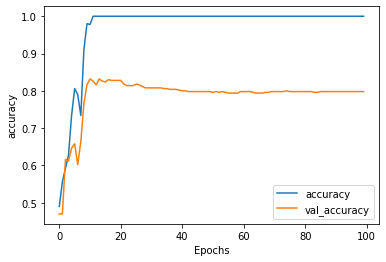

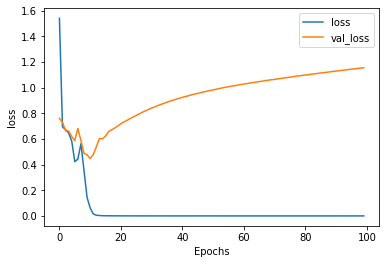

16/16 [==============================] - 1s 75ms/step


In [462]:
#return_5 = Model5(df.loc[0:49], df.loc[50:99])

Epoch 1/10
152/152 - 56s - loss: 0.6662 - accuracy: 0.6803 - val_loss: 0.3577 - val_accuracy: 0.8591 - 56s/epoch - 370ms/step
Epoch 2/10
152/152 - 53s - loss: 0.2775 - accuracy: 0.8831 - val_loss: 0.2535 - val_accuracy: 0.9060 - 53s/epoch - 352ms/step
Epoch 3/10
152/152 - 53s - loss: 0.1553 - accuracy: 0.9369 - val_loss: 0.3879 - val_accuracy: 0.8322 - 53s/epoch - 349ms/step
Epoch 4/10
152/152 - 51s - loss: 0.0802 - accuracy: 0.9728 - val_loss: 0.4097 - val_accuracy: 0.8658 - 51s/epoch - 335ms/step
Epoch 5/10
152/152 - 53s - loss: 0.0375 - accuracy: 0.9895 - val_loss: 0.5269 - val_accuracy: 0.8591 - 53s/epoch - 348ms/step
Epoch 6/10
152/152 - 53s - loss: 0.0229 - accuracy: 0.9946 - val_loss: 0.6146 - val_accuracy: 0.8591 - 53s/epoch - 349ms/step
Epoch 7/10
152/152 - 53s - loss: 0.0101 - accuracy: 0.9979 - val_loss: 0.7862 - val_accuracy: 0.8456 - 53s/epoch - 347ms/step
Epoch 8/10
152/152 - 53s - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.9555 - val_accuracy: 0.8389 - 53s/epoch - 346

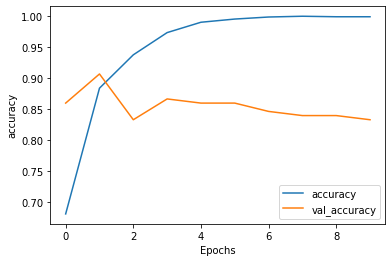

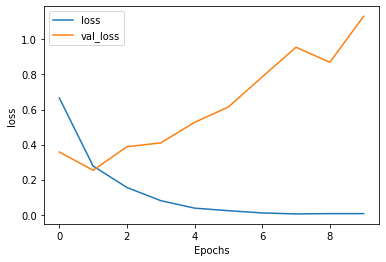

5/5 [==============================] - 1s 110ms/step


In [455]:
#return_5 = Model5(df.loc[0:4750], df.loc[4751:4999])

# Assesing Performance

training size:  291944
test_index size:  72987
Run (cross-validation):  1  out of  5
-------------------------- Model 1 
Model 1 done in   0.040998000000001866 

-------------------------- Model 2 
Model 2 done in  0.032637999999963085
-------------------------- Model 3 
-------------------------- Model 3 done in  117.27551799999998 

-------------------------- Model 4 
Model 4 done in  171.68185699999998
-------------------------- Model 5 
Epoch 1/5
9124/9124 - 469s - loss: 0.2345 - accuracy: 0.9005 - val_loss: 0.1888 - val_accuracy: 0.9209 - 469s/epoch - 51ms/step
Epoch 2/5
9124/9124 - 474s - loss: 0.1714 - accuracy: 0.9292 - val_loss: 0.1691 - val_accuracy: 0.9309 - 474s/epoch - 52ms/step
Epoch 3/5
9124/9124 - 468s - loss: 0.1446 - accuracy: 0.9419 - val_loss: 0.1631 - val_accuracy: 0.9347 - 468s/epoch - 51ms/step
Epoch 4/5
9124/9124 - 468s - loss: 0.1226 - accuracy: 0.9519 - val_loss: 0.1626 - val_accuracy: 0.9369 - 468s/epoch - 51ms/step
Epoch 5/5
9124/9124 - 470s - loss: 0.1021 -

INFO:tensorflow:Assets written to: ram://af02f8fc-7070-42c8-a3b8-51bd6834a0db/assets


INFO:tensorflow:Assets written to: ram://af02f8fc-7070-42c8-a3b8-51bd6834a0db/assets


INFO:tensorflow:Assets written to: ram://ef8a4576-ef66-425d-9909-e26f160ecb22/assets


INFO:tensorflow:Assets written to: ram://ef8a4576-ef66-425d-9909-e26f160ecb22/assets


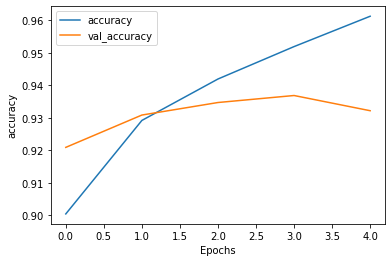

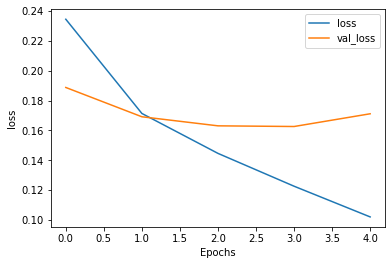

2281/2281 [==============================] - 29s 13ms/step
Model 5 done in  5323.040146 

training size:  291945
test_index size:  72986
Run (cross-validation):  2  out of  5
-------------------------- Model 1 
Model 1 done in   0.032185000000026776 

-------------------------- Model 2 
Model 2 done in  0.03432299999985844
-------------------------- Model 3 
-------------------------- Model 3 done in  117.19499799999994 

-------------------------- Model 4 
Model 4 done in  170.51838399999997
-------------------------- Model 5 
Epoch 1/5
9124/9124 - 469s - loss: 0.2278 - accuracy: 0.9043 - val_loss: 0.1836 - val_accuracy: 0.9233 - 469s/epoch - 51ms/step
Epoch 2/5
9124/9124 - 467s - loss: 0.1656 - accuracy: 0.9323 - val_loss: 0.1679 - val_accuracy: 0.9317 - 467s/epoch - 51ms/step
Epoch 3/5
9124/9124 - 464s - loss: 0.1408 - accuracy: 0.9441 - val_loss: 0.1627 - val_accuracy: 0.9346 - 464s/epoch - 51ms/step
Epoch 4/5
9124/9124 - 464s - loss: 0.1200 - accuracy: 0.9534 - val_loss: 0.1667 - 

INFO:tensorflow:Assets written to: ram://35192c57-4c7e-4ea2-8b82-96490322e5a8/assets


INFO:tensorflow:Assets written to: ram://35192c57-4c7e-4ea2-8b82-96490322e5a8/assets


INFO:tensorflow:Assets written to: ram://dc9d9a48-ef9f-43c8-8d08-a039b02e84ae/assets


INFO:tensorflow:Assets written to: ram://dc9d9a48-ef9f-43c8-8d08-a039b02e84ae/assets


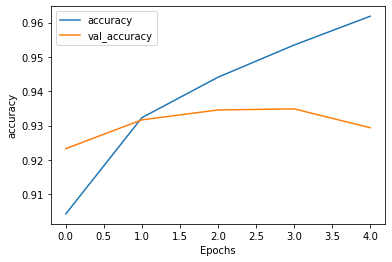

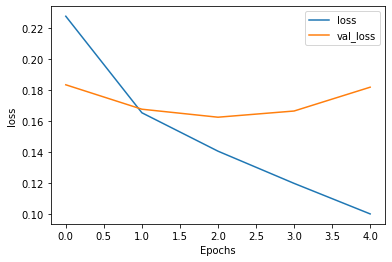

2281/2281 [==============================] - 29s 13ms/step
Model 5 done in  5294.564642 

training size:  291945
test_index size:  72986
Run (cross-validation):  3  out of  5
-------------------------- Model 1 
Model 1 done in   0.029173000000810134 

-------------------------- Model 2 
Model 2 done in  0.034895000000688015
-------------------------- Model 3 
-------------------------- Model 3 done in  118.13562300000012 

-------------------------- Model 4 
Model 4 done in  171.04259600000114
-------------------------- Model 5 
Epoch 1/5
9124/9124 - 467s - loss: 0.2272 - accuracy: 0.9041 - val_loss: 0.1861 - val_accuracy: 0.9245 - 467s/epoch - 51ms/step
Epoch 2/5
9124/9124 - 469s - loss: 0.1689 - accuracy: 0.9310 - val_loss: 0.1681 - val_accuracy: 0.9312 - 469s/epoch - 51ms/step
Epoch 3/5
9124/9124 - 468s - loss: 0.1446 - accuracy: 0.9421 - val_loss: 0.1671 - val_accuracy: 0.9347 - 468s/epoch - 51ms/step
Epoch 4/5
9124/9124 - 466s - loss: 0.1245 - accuracy: 0.9509 - val_loss: 0.1666 -

INFO:tensorflow:Assets written to: ram://de350fe6-dfe4-4102-a3a5-34ab7c3f35c4/assets


INFO:tensorflow:Assets written to: ram://de350fe6-dfe4-4102-a3a5-34ab7c3f35c4/assets


INFO:tensorflow:Assets written to: ram://ccbc81b0-b613-4ddb-97c4-7dd1147b83cf/assets


INFO:tensorflow:Assets written to: ram://ccbc81b0-b613-4ddb-97c4-7dd1147b83cf/assets


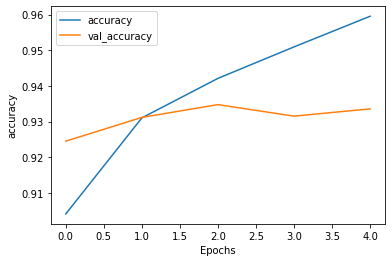

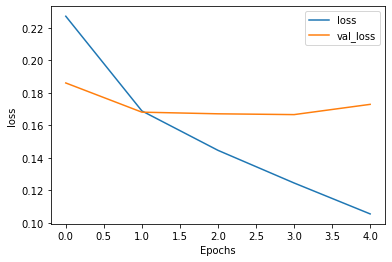

2281/2281 [==============================] - 29s 13ms/step
Model 5 done in  5304.217556 

training size:  291945
test_index size:  72986
Run (cross-validation):  4  out of  5
-------------------------- Model 1 
Model 1 done in   0.03211799999917275 

-------------------------- Model 2 
Model 2 done in  0.029325000003154855
-------------------------- Model 3 
-------------------------- Model 3 done in  117.98625100000208 

-------------------------- Model 4 
Model 4 done in  171.19580199999837
-------------------------- Model 5 
Epoch 1/5
9124/9124 - 467s - loss: 0.2206 - accuracy: 0.9067 - val_loss: 0.1822 - val_accuracy: 0.9258 - 467s/epoch - 51ms/step
Epoch 2/5
9124/9124 - 467s - loss: 0.1611 - accuracy: 0.9352 - val_loss: 0.1691 - val_accuracy: 0.9304 - 467s/epoch - 51ms/step
Epoch 3/5
9124/9124 - 467s - loss: 0.1365 - accuracy: 0.9455 - val_loss: 0.1663 - val_accuracy: 0.9352 - 467s/epoch - 51ms/step
Epoch 4/5
9124/9124 - 468s - loss: 0.1172 - accuracy: 0.9544 - val_loss: 0.1643 - 

INFO:tensorflow:Assets written to: ram://f0a375a3-806f-4ff5-a794-1e967463ff8b/assets


INFO:tensorflow:Assets written to: ram://f0a375a3-806f-4ff5-a794-1e967463ff8b/assets


INFO:tensorflow:Assets written to: ram://ab794258-7d08-4df9-b44e-6d8f12bf8b90/assets


INFO:tensorflow:Assets written to: ram://ab794258-7d08-4df9-b44e-6d8f12bf8b90/assets


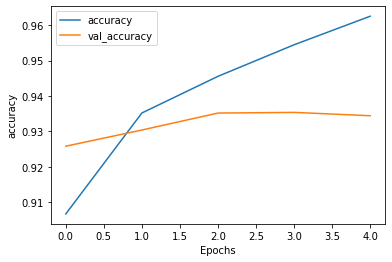

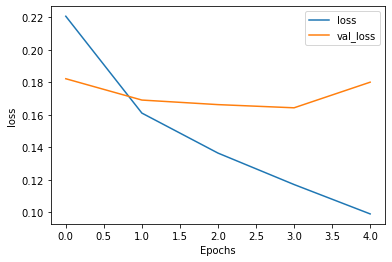

2281/2281 [==============================] - 29s 13ms/step
Model 5 done in  5301.975055999999 

training size:  291945
test_index size:  72986
Run (cross-validation):  5  out of  5
-------------------------- Model 1 
Model 1 done in   0.02958000000216998 

-------------------------- Model 2 
Model 2 done in  0.02906799999982468
-------------------------- Model 3 
-------------------------- Model 3 done in  118.3355670000019 

-------------------------- Model 4 
Model 4 done in  171.71438200000193
-------------------------- Model 5 
Epoch 1/5
9124/9124 - 467s - loss: 0.2320 - accuracy: 0.9027 - val_loss: 0.1968 - val_accuracy: 0.9157 - 467s/epoch - 51ms/step
Epoch 2/5
9124/9124 - 467s - loss: 0.1714 - accuracy: 0.9299 - val_loss: 0.1708 - val_accuracy: 0.9311 - 467s/epoch - 51ms/step
Epoch 3/5
9124/9124 - 468s - loss: 0.1464 - accuracy: 0.9412 - val_loss: 0.1671 - val_accuracy: 0.9320 - 468s/epoch - 51ms/step
Epoch 4/5
9124/9124 - 468s - loss: 0.1252 - accuracy: 0.9507 - val_loss: 0.162

INFO:tensorflow:Assets written to: ram://c46af6ec-0b5e-43cb-beb7-7e947f5387eb/assets


INFO:tensorflow:Assets written to: ram://c46af6ec-0b5e-43cb-beb7-7e947f5387eb/assets


INFO:tensorflow:Assets written to: ram://c687364a-920a-49f5-85ec-f02176bb2921/assets


INFO:tensorflow:Assets written to: ram://c687364a-920a-49f5-85ec-f02176bb2921/assets


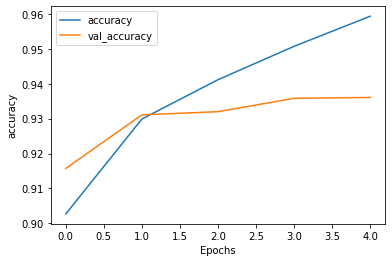

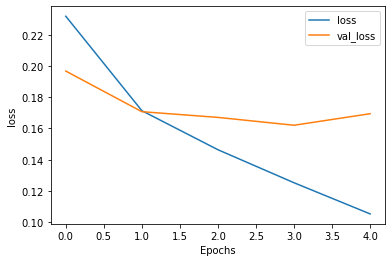

2281/2281 [==============================] - 29s 13ms/step
Model 5 done in  5310.418042000001 

Complete


In [51]:
#train,test = model_selection.train_test_split(df,test_size=0.2, shuffle=True)

n = 5

kf = model_selection.KFold(n_splits=n)

#
def confusMatrix(d):
    tp = d[['label','predicted','count']].query('label == 1 and predicted == 1')
    tp = 0 if tp['count'].empty else tp['count'].values[0]    
    tn = d[['label','predicted','count']].query('label == 0 and predicted == 0')
    tn = 0 if tn['count'].empty else tn['count'].values[0]
    fp = d[['label','predicted','count']].query('label == 0 and predicted == 1')
    fp = 0 if fp['count'].empty else fp['count'].values[0]
    fn = d[['label','predicted','count']].query('label == 1 and predicted == 0')
    fn = 0 if fn['count'].empty else fn['count'].values[0]   
    return tp,tn,fp,fn
    
result = []
result_detailed = []

i = 1
df = df[['id','content','label']]

#for train, test in tqdm(kfold.split(x, y), total=kfold.get_n_splits(), desc="k-fold"):
for train_index, test_index in kf.split(df):
    print("training size: ",len(train_index))
    print("test_index size: ",len(test_index))
    
    #for train_index, test_index in tqdm(kf.split(df), total=kfold.get_n_splits(), desc="k-fold"):
    print("Run (cross-validation): ", i, " out of ",n)
    
    ###############
    # Model 1
    ####################
    print("-------------------------- Model 1 ")
    start = time.process_time()
    train,test = Model1(df.loc[train_index], df.loc[test_index])
        
    ##### Training
    tp,tn,fp,fn = confusMatrix(train.groupby(['label','predicted']).size().reset_index(name='count'))
    result.append([tp,tn,fp,fn,'train','model1']) 
    result_detailed.append([train['label'],train['predicted'],'train','model1',i])
    
    ##### Validate
    tp,tn,fp,fn = confusMatrix(test.groupby(['label','predicted']).size().reset_index(name='count'))    
    result.append([tp,tn,fp,fn,'validate','model1'])
    result_detailed.append([test['label'],test['predicted'],'validate','model1',i])
    
    print("Model 1 done in  ", time.process_time() - start ,"\n")
    
    
    ###############
    # Model 2
    ###############
    print("-------------------------- Model 2 ")
    start = time.process_time()
    train,test = Model2(df.loc[train_index]), Model2(df.loc[test_index])

    ##### Training
    tp,tn,fp,fn = confusMatrix(train.groupby(['label','predicted']).size().reset_index(name='count'))
    result.append([tp,tn,fp,fn,'train','model2'])  
    result_detailed.append([train['label'],train['predicted'],'train','model2',i])
    
    ##### Validate
    tp,tn,fp,fn = confusMatrix(test.groupby(['label','predicted']).size().reset_index(name='count'))    
    result.append([tp,tn,fp,fn,'validate','model2'])
    result_detailed.append([test['label'],test['predicted'],'validate','model2',i])
    
    print("Model 2 done in ", time.process_time() - start)
    
    ###############
    # Model 3: Support Vector Machine (SVM)
    ###############
    print("-------------------------- Model 3 ")
    start = time.process_time()
    train, test = Model3(df.loc[train_index], df.loc[test_index])
    
    ##### Training
    tp,tn,fp,fn = confusMatrix(train.groupby(['label','predicted']).size().reset_index(name='count'))
    result.append([tp,tn,fp,fn,'train','model3'])
    result_detailed.append([train['label'],train['predicted'],'train','model3',i])
    
    # Validate
    tp,tn,fp,fn = confusMatrix(test.groupby(['label','predicted']).size().reset_index(name='count'))  
    result.append([tp,tn,fp,fn,'validate','model3'])
    result_detailed.append([test['label'],test['predicted'],'validate','model3',i])
    
    print("-------------------------- Model 3 done in ", time.process_time() - start,'\n')
    
    ###############
    # Model 4: Naive Bayes
    ###############
    print("-------------------------- Model 4 ")
    start = time.process_time()
    train, test = Model4(df.loc[train_index], df.loc[test_index])   
    ###### Training
    tp,tn,fp,fn = confusMatrix(train.groupby(['label','predicted']).size().reset_index(name='count'))
    result.append([tp,tn,fp,fn,'train','model4'])
    result_detailed.append([train['label'],train['predicted'],'train','model4',i])
    
    ###### Validate
    tp,tn,fp,fn = confusMatrix(test.groupby(['label','predicted']).size().reset_index(name='count'))  
    result.append([tp,tn,fp,fn,'validate','model4'])
    result_detailed.append([test['label'],test['predicted'],'validate','model4',i])
    
    print("Model 4 done in ", time.process_time() - start)
    
    ###############
    # Model 5: Long Short-Term Memory (LSTM)
    ###############
     
    print("-------------------------- Model 5 ")
    start = time.process_time()
    train, test = Model5(df.loc[train_index], df.loc[test_index])
    
    ##### Training
    tp,tn,fp,fn = confusMatrix(train.groupby(['label','predicted']).size().reset_index(name='count'))
    result.append([tp,tn,fp,fn,'train','model5'])
    result_detailed.append([train['label'],train['predicted'],'train','model5',i])
    
     # Validate
    tp,tn,fp,fn = confusMatrix(test.groupby(['label','predicted']).size().reset_index(name='count'))  
    result.append([tp,tn,fp,fn,'validate','model5'])
    result_detailed.append([test['label'],test['predicted'],'validate','model5',i])
    
    print("Model 5 done in ", time.process_time() - start ,"\n")
    
        
    i += 1
    
def safe_division(n, d):
    return n / d if d else 0
  
print("Complete")

d = pd.DataFrame(result, columns=['tp','tn','fp','fn','type','model'])
d = d.assign(total_count = lambda x : (d['tp']+d['tn']+d['fp']+d['fn']) ) 
d = d.assign(precision = lambda x : (d['tp']).div(d['tp']+d['fp']) ) 
d = d.assign(recall = lambda x : (d['tp']).div(d['tp']+d['fn']) ) 
d = d.assign(specificity = lambda x : (d['tn']).div(d['tn']+d['fp']) )
d = d.assign(Neg_pred_value = lambda x : (d['tn']).div(d['tn']+d['fn']) )

d = d.assign(Accuracy = lambda x : (d['tp']+d['tn']).div(d['tp']+d['tn']+d['fp']+d['fn']) )
d = d.assign(f1 = lambda x : 2*(d['precision']*d['recall']).div(d['precision']+d['recall']) ) 


In [52]:
# Model 3 = SVM
# Model 4 = Naive Bayes
# Model 5 = LSTM ; Epoch = 5
d.groupby(["model",'type']).mean()

tp        tn       fp        fn  total_count  \
model  type                                                           
model1 train          0.0  157948.8      0.0  133996.0     291944.8   
       validate       0.0   39487.2      0.0   33499.0      72986.2   
model2 train      66969.4   78967.4  78981.4   67026.6     291944.8   
       validate   16709.2   19749.2  19738.0   16789.8      72986.2   
model3 train      87419.8  155546.2   2402.6   46576.2     291944.8   
       validate   24195.8   38181.2   1306.0    9303.2      72986.2   
model4 train      95751.2  153062.0   4886.8   38244.8     291944.8   
       validate   23337.6   38143.0   1344.2   10161.4      72986.2   
model5 train     128779.0  155418.2   2530.6    5217.0     291944.8   
       validate   30687.8   37417.4   2069.8    2811.2      72986.2   

                 precision    recall  specificity  Neg_pred_value  Accuracy  \
model  type                                                                   
model1 train           NaN  0.000000     1.000000        0.541023  0.541023   
       validate        NaN  0.000000     1.000000        0.541023  0.541023   
model2 train      0.458849  0.499788     0.499955        0.540895  0.499878   
       validate   0.458456  0.498794     0.500150        0.540497  0.499525   
model3 train      0.973255  0.652404     0.984788        0.769567  0.832233   
       validate   0.948785  0.722278     0.966927        0.804079  0.854641   
model4 train      0.951442  0.714582     0.969061        0.800087  0.852261   
       validate   0.945537  0.696664     0.965960        0.789637  0.842359   
model5 train      0.980815  0.961063     0.983977        0.967604  0.973462   
       validate   0.937034  0.916090     0.947593        0.930200  0.933124   

                       f1  
model  type                
model1 train          NaN  
       validate       NaN  
model2 train     0.478444  
       validate  0.477770  
model3 train     0.781163  
       validate  0.820179  
model4 train     0.816174  
       validate  0.802240  
model5 train     0.970786  
       validate  0.926347

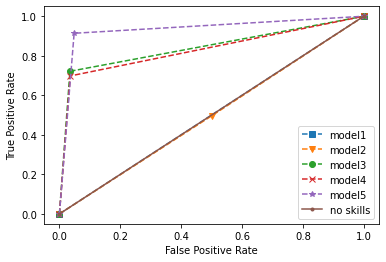

In [53]:
# generate a no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(test['label']))]


# calculate scores
#ns_auc = roc_auc_score(validate['label'], ns_probs)
#lr_auc = roc_auc_score(test['label'], test['predicted'])

# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
#print('Logistic: ROC AUC=%.3f' % (lr_auc))


# calculate roc curves
plt_df = pd.DataFrame(result_detailed, columns=['label','predicted','type','model','cross_validation_run'])

# No Skill
ns_probs = [0 for _ in range(len(train['label']))]

# Model 1 
a = plt_df[['label','predicted','type','model','cross_validation_run']].query('type == "validate" and model == "model1"and cross_validation_run == 4').explode(['label','predicted']).reset_index()
# Model 2
b = plt_df[['label','predicted','type','model','cross_validation_run']].query('type == "validate" and model == "model2"and cross_validation_run == 4').explode(['label','predicted']).reset_index()
# Model 3
c = plt_df[['label','predicted','type','model','cross_validation_run']].query('type == "validate" and model == "model3"and cross_validation_run == 4').explode(['label','predicted']).reset_index()
# Model 4
d = plt_df[['label','predicted','type','model','cross_validation_run']].query('type == "validate" and model == "model4"and cross_validation_run == 4').explode(['label','predicted']).reset_index()
# Model 5
e = plt_df[['label','predicted','type','model','cross_validation_run']].query('type == "validate" and model == "model5"and cross_validation_run == 4').explode(['label','predicted']).reset_index()

# No Skill
ns_probs = [0 for _ in range(len(e['predicted']))]


#a = a_df[['label','predicted','type','model','cross_validation_run']].query('type == "validate" and model == "model2"and cross_validation_run == 11').copy()
#a = a.explode(['label','predicted']).reset_index()

#b = a_df[['label','predicted']].query('type == validate and model == model2')
#c = a_df[['label','predicted']].query('type == validate and model == model3')
#temp = a['label'].astype(int)
#print(temp)
#ns_fpr, ns_tpr, _ = roc_curve(a['label'], a['predicted'])
ns_fpr, ns_tpr, _ = roc_curve(a['label'].astype(int), a['predicted'].astype(int))
b1, b2, _ = roc_curve(b['label'].astype(int), b['predicted'].astype(int))
c1, c2, _ = roc_curve(c['label'].astype(int), c['predicted'].astype(int))
d1, d2, _ = roc_curve(d['label'].astype(int), d['predicted'].astype(int))
e1, e2, _ = roc_curve(e['label'].astype(int), e['predicted'].astype(int))
ns_1, ns_2, _ = roc_curve(e['label'].astype(int), ns_probs)


#lr_fpr, lr_tpr, _ = roc_curve(b['label'], b['predicted'])
#c1, c2, _ = roc_curve(c['label'], c['predicted'])

# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, marker='s', linestyle='--', label='model1')
pyplot.plot(b1, b2, marker='v', linestyle='--', label='model2')
pyplot.plot(c1, c2, marker='o', linestyle='--', label='model3')
pyplot.plot(d1, d2,  marker='x', linestyle='--', label='model4')
pyplot.plot(e1, e2, marker='*', linestyle='--', label='model5')
pyplot.plot(ns_1, ns_2, marker='.', label='no skills')

#pyplot.plot(lr_fpr, lr_tpr, marker='.', label='model2')
#pyplot.plot(c1, c2, marker='.', label='model3')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [54]:
# Save as CSV
plt_df.explode(['label','predicted']).to_csv("model_export_data.csv", sep=',')